In [17]:
import contextlib
import os
import time
from IPython.display import Audio
import pyaudio
import wave
from windows_volume_controller import MasterVolumeController
import pickle
from pydub import AudioSegment
from pydub.playback import play

VOLUME_INFO_FILENAME = "volume_info.dat"
INITIAL_RECORDING_FILENAME = "initial.wav"
PLAYBACK_RECORDING_FILENAME = "playback.wav"
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
SAMPLE_RATE = 48000
RECORD_SECONDS = 10

volume_controller = MasterVolumeController()

with contextlib.suppress(OSError):
    os.remove(VOLUME_INFO_FILENAME)

In [35]:
def record_audio(filename):
    # initialize PyAudio object
    p = pyaudio.PyAudio()
    # open stream object as input & output
    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=SAMPLE_RATE,
                    input=True,
                    output=True,
                    frames_per_buffer=CHUNK)
    frames = []
    print(f"Recording for {RECORD_SECONDS} seconds...")
    for _ in range(int(SAMPLE_RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        # if you want to hear your voice while recording
        # stream.write(data)
        frames.append(data)
    print("Finished recording.")
    # stop and close stream
    stream.stop_stream()
    stream.close()
    # terminate pyaudio object
    p.terminate()
    # save audio file
    # open the file in 'write bytes' mode
    print(f"Saving to audio file '{filename}'...")
    wf = wave.open(filename, "wb")
    # set the channels
    wf.setnchannels(CHANNELS)
    # set the sample format
    wf.setsampwidth(p.get_sample_size(FORMAT))
    # set the sample rate
    wf.setframerate(SAMPLE_RATE)
    # write the frames as bytes
    wf.writeframes(b"".join(frames))
    print("Done")
    # close the file
    wf.close()

def play_audio(filename, vol):
    playback_audio = AudioSegment.from_file(filename)
    print(f"Playing on current volume of {volume_controller.get_volume() * 100}")
    play(playback_audio)
    print("Done")
    time.sleep(2)
    print(f"Resetting the volume to {vol}")
    volume_controller.set_volume(vol / 100)
    print("Playing...")
    play(playback_audio)
    print("Done")


In [22]:
# Record & Save Audio and Volume
record_audio(INITIAL_RECORDING_FILENAME)
Audio(INITIAL_RECORDING_FILENAME)

Getting current master volume in dB...
Saving volume info...
Recording for 10 seconds...
Finished recording.
Saving to audio file 'initial.wav'...
Done


In [23]:
record_audio(PLAYBACK_RECORDING_FILENAME)
Audio(PLAYBACK_RECORDING_FILENAME)

Getting current master volume in dB...
Saving volume info...
Recording for 10 seconds...
Finished recording.
Saving to audio file 'playback.wav'...
Done


In [24]:
initial_DB = AudioSegment.from_file(INITIAL_RECORDING_FILENAME).dBFS
playback_DB = AudioSegment.from_file(PLAYBACK_RECORDING_FILENAME).dBFS
print(initial_DB)
print(playback_DB)

-27.92388091363562
-28.232924280075217


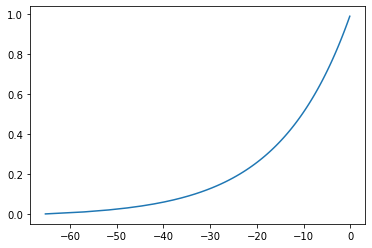

In [20]:
x = [i / 100 for i in range(100)]
y = []
for i in x:
    volume_controller.set_volume(i)
    y.append(volume_controller.get_volume_db())

import matplotlib.pyplot as plt
plt.plot(y, x)

In [25]:
y

[-65.25,
 -56.992191314697266,
 -51.671180725097656,
 -47.73759078979492,
 -44.61552047729492,
 -42.026729583740234,
 -39.81534194946289,
 -37.88519287109375,
 -36.17274856567383,
 -34.63383865356445,
 -33.23651123046875,
 -31.956890106201172,
 -30.77667808532715,
 -29.681535720825195,
 -28.66002082824707,
 -27.70285415649414,
 -26.80240821838379,
 -25.95233154296875,
 -25.147287368774414,
 -24.38274574279785,
 -23.654823303222656,
 -22.960174560546875,
 -22.295886993408203,
 -21.6594181060791,
 -21.048532485961914,
 -20.461252212524414,
 -19.895822525024414,
 -19.350669860839844,
 -18.824398040771484,
 -18.315736770629883,
 -17.82354736328125,
 -17.3467960357666,
 -16.884546279907227,
 -16.435937881469727,
 -16.000192642211914,
 -15.576590538024902,
 -15.164472579956055,
 -14.763236045837402,
 -14.372318267822266,
 -13.991202354431152,
 -13.61940860748291,
 -13.256492614746094,
 -12.902039527893066,
 -12.555663108825684,
 -12.217005729675293,
 -11.88572883605957,
 -11.561516761779785,

In [27]:
upper_vol_db = initial_DB
lower_vol_db = y[0]
target_db = playback_DB
corresponding_vol_db = y
corresponding_steps = len(corresponding_vol_db)
step_size = (upper_vol_db - lower_vol_db) / (corresponding_steps - 1)
target_range_vol_db = [lower_vol_db]

for i in range(2, corresponding_steps + 1):
    corresponding_vol = lower_vol_db + step_size * (i - 1)
    target_range_vol_db.append(corresponding_vol)

for e, i in enumerate(target_range_vol_db):
    print(e, i)

curr_db = 0
prev_db = target_range_vol_db[0]
target_vol = 0
for i in range(len(target_range_vol_db)):
    curr_db = target_range_vol_db[i]
    if (prev_db < target_db < curr_db):
        print(i - 0.5)
        target_vol = i - 0.5
    prev_db = curr_db

0 -65.25
1 -64.87296849407713
2 -64.49593698815426
3 -64.11890548223138
4 -63.74187397630851
5 -63.36484247038564
6 -62.98781096446277
7 -62.610779458539895
8 -62.23374795261702
9 -61.85671644669415
10 -61.47968494077128
11 -61.102653434848406
12 -60.725621928925534
13 -60.348590423002655
14 -59.97155891707978
15 -59.59452741115691
16 -59.21749590523404
17 -58.840464399311166
18 -58.463432893388294
19 -58.08640138746542
20 -57.70936988154255
21 -57.33233837561968
22 -56.955306869696805
23 -56.57827536377393
24 -56.20124385785106
25 -55.82421235192819
26 -55.44718084600532
27 -55.070149340082445
28 -54.69311783415957
29 -54.3160863282367
30 -53.93905482231382
31 -53.56202331639095
32 -53.18499181046808
33 -52.807960304545205
34 -52.43092879862233
35 -52.05389729269946
36 -51.67686578677659
37 -51.299834280853716
38 -50.922802774930844
39 -50.54577126900797
40 -50.1687397630851
41 -49.79170825716223
42 -49.414676751239355
43 -49.03764524531648
44 -48.66061373939361
45 -48.28358223347074


In [34]:
play_audio(PLAYBACK_RECORDING_FILENAME, target_vol)

Playing on current volume of 40.00000059604645
Done
Resetting the volume to 98.5
Playing...
Done
